# Perfectly Matched Layer (PML)
- Explain the concept of PML through coordinate transformation.
- Show that the performance of PML should be characterized by the amplitude rather than the intensity of parasitic reflection, and present a simple approach to compute parasitic reflection at many frequencies.
- Illustrate typical signature in the spectrum when the parasitic reflection at the boundary is significant.

In [1]:
# standard python imports
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

In [25]:
# The setup of the 1D simulation:8

# |     |          |        |            |         |            |     |
# |`PML`|   dPML   |`source`|  distance  |`monitor`|  distance  |`PML`|
# |     |          |        |            |         |            |     |

# Number of PML layers
Npml = 12 # the default number of layers is 12

# sufficiently large distance between the source and the time monitor
distance = 100 #um
# distance between the source and PML
dPML = 1 #um

# Wavelength and frequency range of the source
freq0 = 300e12 #Hz, central frequency
fwidth = freq0/5 #frequency pulse width
lambda0 = td.C_0 / freq0

# resolution
resolution = 20
dl = lambda0/resolution

# runtime
t_stop = 5e-12

# simulation domain size
sim_size = Lx, Ly, Lz = (dl, dl, 2*distance+dPML)

In [26]:
# Uniform grid
grid_spec = td.GridSpec.uniform(dl=dl)

# Planewave source
src_z = dPML - Lz/2
source = td.PlaneWave(
    center=(0,0,src_z),
    size=(td.inf, td.inf, 0),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth,
    ),
    direction='+',
    name='Gaussian pulse',
)

# Time monitor at a single point
tmnt_pt = td.FieldTimeMonitor(
    center=(0, 0, src_z + distance),
    name='time',
    size=(0, 0, 0),
)

# PML boundary
pml = td.Boundary.pml(num_layers=Npml)
bspec = td.BoundarySpec(x=td.Boundary.periodic(), y = td.Boundary.periodic(), z=pml)

00:12:23 +07 WARNING: The monitor 'interval' field was left as its default      
             value, which will set it to 1 internally. A value of 1 means that  
             the data will be sampled at every time step, which may potentially 
             produce more data than desired, depending on the use case. To      
             reduce data storage, one may downsample the data by setting        
             'interval > 1' or by choosing alternative 'start' and 'stop' values
             for the time sampling. If you intended to use the highest          
             resolution time sampling, you may suppress this warning by         
             explicitly setting 'interval=1' in the monitor.                    

In [27]:
sim = td.Simulation(
    center = (0, 0, 0),
    size = sim_size,
    grid_spec = grid_spec,
    structures = [],
    sources = [source],
    monitors = [tmnt_pt],
    run_time = t_stop,
    boundary_spec = bspec,
    shutoff = 0,
)

In [28]:
sim_data = web.run(sim, task_name='lecture06_pml_reflection', path=f'data/data_pml_reflection.hdf5')

00:12:27 +07 Created task 'lecture06_pml_reflection' with task_id               
             'fdve-63264e20-9994-4de8-8dde-650678791f8b' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=211825;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=65050;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\taskId]8;;\]8;id=211825;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\=]8;;\]8;id=89606;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\fdve]8;;\]8;id=211825;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\-63264e20-999]8;;\
             ]8;id=211825;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\4-4de8-8dde-650678791f8b']8;;\.

00:12:30 +07 status = queued

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

00:12:52 +07 status = preprocess

00:12:55 +07 Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

             running solver

00:13:03 +07 status = postprocess

             status = success

00:13:04 +07 View simulation result at                                          
             ]8;id=49173;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=868532;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\taskId]8;;\]8;id=49173;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\=]8;;\]8;id=327418;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\fdve]8;;\]8;id=49173;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\-63264e20-999]8;;\
             ]8;id=49173;https://tidy3d.simulation.cloud/workbench?taskId=fdve-63264e20-9994-4de8-8dde-650678791f8b\4-4de8-8dde-650678791f8b']8;;\.

00:13:15 +07 loading simulation from data/data_pml_reflection.hdf5

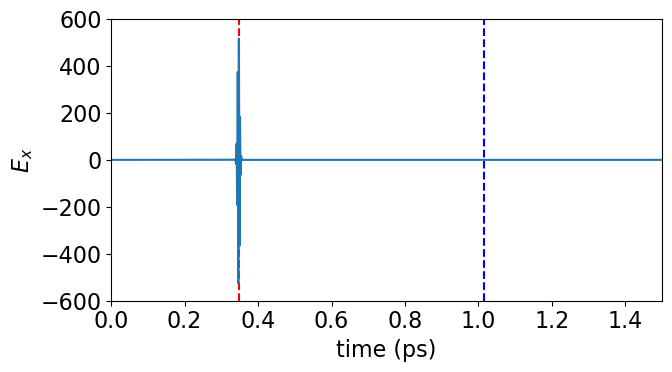

In [29]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,figsize=(7,4), tight_layout=True)

speed = td.C_0
time_reach_monitor = source.source_time.offset/fwidth/2/np.pi + distance/speed
time_reflection = time_reach_monitor + 2*distance/speed
ax.vlines(time_reach_monitor*1e12,-600,600,colors='r',linestyle='dashed')
ax.vlines(time_reflection*1e12,-600,600,colors='b',linestyle='dashed')

time_data = sim_data['time']
Ex = time_data.Ex
Ex_values = np.squeeze(Ex.values)

ax.plot(Ex.t*1e12,Ex_values)
ax.set_xlabel('time (ps)')
ax.set_ylabel('$E_x$')
ax.set_xlim(0,1.5)
ax.set_ylim(-600,600)
plt.show()

In [30]:
# First, let's select two time intervals of equal length. The first interval
# completely contains the original incident pulse, and the second interval
# completely contains the reflected pulse. We take the former to
# be [0,time_reach_PML), and the latter to be [time_reach_PML,2*time_reach_PML)

time_reach_PML = source.source_time.offset/fwidth/2/np.pi + 2* distance/speed
inds = np.argwhere(np.array(Ex.t)>=time_reach_PML)
Nt = int(inds[0])

/tmp/ipykernel_59406/886578433.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nt = int(inds[0])


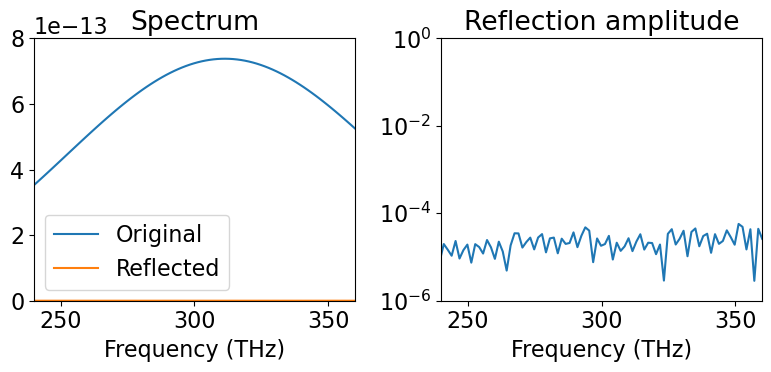

In [31]:
# Now let's perform FFT in each interval, and visualize the spectrum
dt = sim.dt
df = 1/Nt/dt
fmesh = np.arange(0, Nt)*df

# original pulse
spectrum_original = 1/np.sqrt(2*np.pi)*np.fft.ifft(np.fft.ifftshift(Ex_values[:Nt]))/df
#reflected pulse
spectrum_reflection = 1/np.sqrt(2*np.pi)*np.fft.ifft(np.fft.ifftshift(Ex_values[Nt:Nt*2]))/df

# visualization of each spectrum
fig, ax = plt.subplots(1,2,figsize=(8,4), tight_layout=True)
ax[0].plot(fmesh/1e12, np.abs(spectrum_original),label='Original')
ax[0].plot(fmesh/1e12, np.abs(spectrum_reflection),label='Reflected')
ax[0].set_xlim((freq0-fwidth)/1e12,(freq0+fwidth)/1e12)
ax[0].set_ylim(0,8e-13)
ax[0].set_xlabel('Frequency (THz)')
ax[0].set_title('Spectrum')
ax[0].legend()

# visualization of reflection spectrum
ax[1].plot(fmesh/1e12, np.abs(spectrum_reflection/spectrum_original))
ax[1].set_xlim((freq0-fwidth)/1e12,(freq0+fwidth)/1e12)
ax[1].set_yscale('log')
ax[1].set_ylim(1e-6,1)
ax[1].set_title('Reflection amplitude')
ax[1].set_xlabel('Frequency (THz)')
plt.show()

In [32]:
# Wavelength and frequency range
freq_range = (200e12, 400e12)
lambda_range = (td.constants.C_0/freq_range[1], td.constants.C_0/freq_range[0])
freq0 = np.sum(freq_range)/2

# frequencies and wavelengths of monitor
Nfreq = 301
monitor_freqs = np.linspace(freq_range[0], freq_range[1], Nfreq)
monitor_lambdas = td.constants.C_0 / monitor_freqs

# central frequency, frequency pulse width and total running time
lambda0 = td.C_0 / freq0
bandwidth = 0.4  # bandwidth of source in units of delta frequency.  0.38 for broadband

freqw  = bandwidth * (freq_range[1] - freq_range[0])
t_stop = 500 / freq0

# Thickness and refractive index of slab
t_slab = 0.5
n_slab = 3.5
mat_slab = td.Medium(permittivity=n_slab**2, name='silicon')

# Grid resolution (cells per um)
dl = 6e-3

# space between slabs and sources and PML
spacing = 16 * lambda_range[-1]

# simulation size
sim_size = Lx, Ly, Lz = (dl, dl, 2*spacing + t_slab)

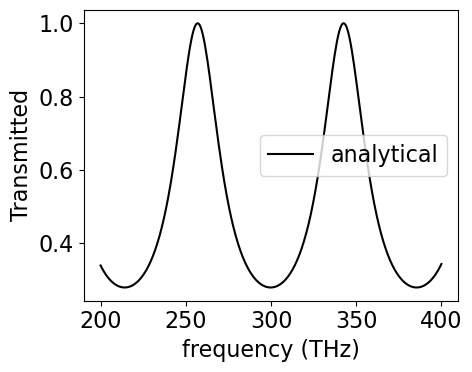

In [33]:
def slab_analytical(d, n, wvl):
    """ computes transmision as a function of slab thickness (d), refractive index (n), and wavelength (wvl). """
    rho = (n-1)/(n+1)
    t = ((1+rho)*(1-rho)*np.exp(-2j*np.pi*n*d/wvl)) / (1 - rho**2*np.exp(-4j*np.pi*n*d/wvl))
    return np.abs(t)**2

transmission_analytical = slab_analytical(t_slab, n_slab, monitor_lambdas)
fig, ax = plt.subplots(1,figsize=(5,4), tight_layout=True)
ax.plot(monitor_freqs / 1e12, transmission_analytical, 'k', label='analytical')
ax.set_xlabel('frequency (THz)')
ax.set_ylabel('Transmitted')
ax.legend()
plt.show()

In [34]:
slab = td.Structure(
    geometry=td.Box(
        center=(0, 0, -Lz/2 + spacing + t_slab/2),
        size=(td.inf, td.inf, t_slab),
    ),
    medium=mat_slab,
    name='slab',
)

# Here we define the planewave source, placed just in advance (towards negative z) of the slab
source = td.PlaneWave(
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=freqw
    ),
    size=(td.inf, td.inf, 0),
    center=(0, 0, -Lz/2+spacing/2),
    direction='+',
    pol_angle=0,
    name='planewave',
)

# We are interested in measuring the transmitted flux, so we set it to be an oversized plane.
monitor = td.FluxMonitor(
    center = (0, 0, Lz/2 - spacing/2),
    size = (td.inf, td.inf, 0),
    freqs = monitor_freqs,
    name='flux',
)

In [35]:
# simulation with default 12 PML layers
pml = td.Boundary.pml()
bspec = td.BoundarySpec(x=td.Boundary.periodic(), y = td.Boundary.periodic(), z=pml)
sim_default = td.Simulation(
    center = (0, 0, 0),
    size = sim_size,
    grid_spec = td.GridSpec.uniform(dl=dl),
    structures = [slab],
    sources = [source],
    monitors = [monitor],
    run_time = t_stop,
    boundary_spec = bspec,
)

# simulation with only 2 PML layers
pml_2layer = td.Boundary.pml(num_layers=12)
bspec_2layer = td.BoundarySpec(x=td.Boundary.periodic(), y = td.Boundary.periodic(), z=pml_2layer)
sim_2layer = sim_default.copy(update={'boundary_spec':bspec_2layer})

In [36]:
sim_FP_data = web.run(sim_default, task_name='lecture06_FP_default_PML', path=f'data/data_FP_default.hdf5')
sim_FP_2layer_data = web.run(sim_2layer, task_name='lecture06_FP_2PMLlayer', path=f'data/data_FP_2layer.hdf5')

00:13:48 +07 Created task 'lecture06_FP_default_PML' with task_id               
             'fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=938647;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=665501;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\taskId]8;;\]8;id=938647;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\=]8;;\]8;id=746287;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\fdve]8;;\]8;id=938647;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\-1e774a21-412]8;;\
             ]8;id=938647;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\8-44fc-a273-4dc575c1ae2a']8;;\.

00:13:51 +07 status = queued

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

00:14:04 +07 status = preprocess

00:14:05 +07 Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

             running solver

00:14:06 +07 early shutoff detected at 12%, exiting.

             status = success

             View simulation result at                                          
             ]8;id=318942;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=127635;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\taskId]8;;\]8;id=318942;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\=]8;;\]8;id=405228;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\fdve]8;;\]8;id=318942;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\-1e774a21-412]8;;\
             ]8;id=318942;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1e774a21-4128-44fc-a273-4dc575c1ae2a\8-44fc-a273-4dc575c1ae2a']8;;\.

00:14:09 +07 loading simulation from data/data_FP_default.hdf5

             Created task 'lecture06_FP_2PMLlayer' with task_id                 
             'fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=842042;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=995675;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\taskId]8;;\]8;id=842042;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\=]8;;\]8;id=273315;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\fdve]8;;\]8;id=842042;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\-83771b1b-c2f]8;;\
             ]8;id=842042;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\2-47e6-a6d0-856d4ccb5c29']8;;\.

00:14:13 +07 status = queued

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

00:14:38 +07 status = preprocess

00:14:40 +07 Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

             running solver

00:14:44 +07 early shutoff detected at 12%, exiting.

             status = postprocess

             status = success

00:14:45 +07 View simulation result at                                          
             ]8;id=417669;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=661101;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\taskId]8;;\]8;id=417669;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\=]8;;\]8;id=969246;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\fdve]8;;\]8;id=417669;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\-83771b1b-c2f]8;;\
             ]8;id=417669;https://tidy3d.simulation.cloud/workbench?taskId=fdve-83771b1b-c2f2-47e6-a6d0-856d4ccb5c29\2-47e6-a6d0-856d4ccb5c29']8;;\.

00:14:46 +07 loading simulation from data/data_FP_2layer.hdf5

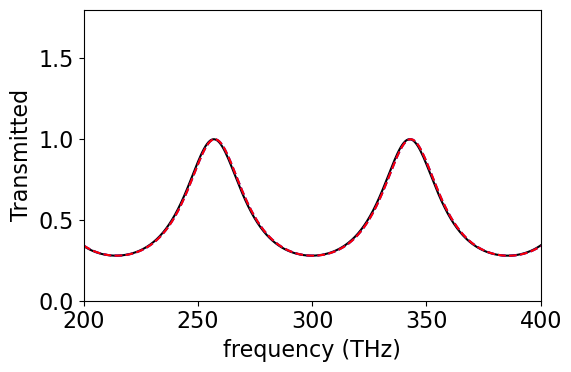

In [37]:
fig, ax = plt.subplots(1,figsize=(6,4), tight_layout=True)

transmission_default = sim_FP_data['flux'].flux
transmission_2layer = sim_FP_2layer_data['flux'].flux

ax.plot(monitor_freqs/1e12, transmission_analytical, 'k', label='analytical')
ax.plot(monitor_freqs/1e12, transmission_default, 'b--', label='default')
ax.plot(monitor_freqs/1e12, transmission_2layer, 'r--', label='2layer')
ax.set_xlabel('frequency (THz)')
ax.set_xlim([200, 400])
ax.set_ylim(0,1.8)
ax.set_ylabel('Transmitted')
plt.show()